In [4]:
from sys import deactivate_stack_trampoline

import  pandas as pd
pd1=pd.Series(range(10,20))
print(pd1)
print(pd1.values)
print(pd1.index)
print(pd1[0])

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
[10 11 12 13 14 15 16 17 18 19]
RangeIndex(start=0, stop=10, step=1)
10


In [5]:
year_data={2011:23,2012:45,2013:67,2014:89}
pd2=pd.Series(year_data)
print(pd2)

2011    23
2012    45
2013    67
2014    89
dtype: int64


In [9]:
import numpy as np
t=pd.DataFrame(np.arange(12).reshape(3,4))
print(t)
print(t.index)
print(t.columns)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
RangeIndex(start=0, stop=3, step=1)
RangeIndex(start=0, stop=4, step=1)


In [8]:
t.loc[2]

0     8
1     9
2    10
3    11
Name: 2, dtype: int64

In [ ]:
import pandas as pd

# 列表套字典 变df
d2 = [{"name" : "xiaohong" , "age" : 32, "tel" : 10010},
      { "name": "xiaogang" , "tel": 10000} ,
      {"name":"xiaowang" ,"age":22}]

df6 = pd.DataFrame(d2)

print(df6) # 缺失值会用NaN填充
print(type(df6.values)) # ndarray

In [ ]:
import pandas as pd
import numpy as np

dict_data = {
    # --- 1. 触发广播机制 (Broadcasting) ---
    'A': 1,                           # [广播] 这是一个标量(1)，它会被自动复制填充到每一行
    'B': pd.Timestamp('20190926'),    # [广播] 时间戳也是单个值，会被复制到每一行

    # --- 2. 定义行数基准 (Driver) ---
    # 以下这几列决定了 DataFrame 的最终行数（这里是 4 行）
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([1, 2, 3, 4], dtype='int32'), # 长度为 4 的数组
    'E': ["Python", "Java", "C++", "C"],        # 长度为 4 的列表

    # --- 3. 再次触发广播 ---
    'F': 'wangdao'                    # [广播] 字符串标量，同样被复制填充 4 次
}

# 创建 DataFrame
df_obj2 = pd.DataFrame(dict_data)

print(df_obj2)

In [11]:
dates=pd.date_range('20190926',periods=6)
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=['A','B','C','D'])
print(df)
print(df["B"])
del(df["A"])


                   A         B         C         D
2019-09-26 -0.097407 -0.505029  0.333453  0.709963
2019-09-27 -0.472558  0.028592 -0.676979  0.175384
2019-09-28  1.104259 -1.156739 -0.068927  2.298887
2019-09-29  0.162589  0.371076 -0.088179  0.702763
2019-09-30 -1.738794  0.883024  1.729466 -0.292428
2019-10-01  0.627360  0.713225 -0.319370 -0.772280
2019-09-26   -0.505029
2019-09-27    0.028592
2019-09-28   -1.156739
2019-09-29    0.371076
2019-09-30    0.883024
2019-10-01    0.713225
Freq: D, Name: B, dtype: float64


In [16]:
import pandas as pd

# 创建一个带有自定义索引的 Series
# range(5) 生成数据 [0, 1, 2, 3, 4]
# list("abcde") 生成索引 ['a', 'b', 'c', 'd', 'e']
ser_obj = pd.Series(range(5), index = list("abcde"))

print(ser_obj)

# 查看 Series 的索引对象
print(ser_obj.index)
print(ser_obj["a":"a"])
print(ser_obj[0:1])


a    0
b    1
c    2
d    3
e    4
dtype: int64
Index(['a', 'b', 'c', 'd', 'e'], dtype='str')
a    0
dtype: int64
a    0
dtype: int64


In [17]:
import pandas as pd
import numpy as np


df_obj = pd.DataFrame(np.random.randn(5,4),
                      columns = ['a', 'b', 'c', 'd'])

print(df_obj.head()) # 打印前5行查看


print("--- 单中括号取值 ---")
print(df_obj['a'])

print('-'*50)

# 2. 使用双中括号 [['a']]
# 取出的是 DataFrame（二维表格，哪怕只有一列）
print("--- 双中括号取值 ---")
print(df_obj[['a']])

print('-'*50)
print("类型检查:", type(df_obj[['a']]))

          a         b         c         d
0  0.395370 -0.549731 -1.689406  0.691591
1 -0.911390  0.046342 -0.002496  1.140699
2 -0.045437  0.573202 -1.889877  1.588160
3 -1.178355 -2.641526  0.079789  0.388673
4 -2.158151 -0.027718  0.155803 -0.455566
--- 单中括号取值 ---
0    0.395370
1   -0.911390
2   -0.045437
3   -1.178355
4   -2.158151
Name: a, dtype: float64
--------------------------------------------------
--- 双中括号取值 ---
          a
0  0.395370
1 -0.911390
2 -0.045437
3 -1.178355
4 -2.158151
--------------------------------------------------
类型检查: <class 'pandas.DataFrame'>


In [21]:
import pandas as pd
import numpy as np
df_obj = pd.DataFrame(np.random.randn(5, 4),
                      columns=list('abcd'),
                      index=list('abcde'))

print("--- 完整表格 ---")
print(df_obj)

print('-' * 50)
# 1. 直接用 ['a'] -> 取的是【列】
# Pandas 默认 [] 优先尝试取列
print("--- df_obj['a'] (取列) ---")
print(df_obj['a']) # 建议不用，容易混淆，拿的是列
print('-' * 50)
# 2. 使用 .loc['a'] -> 取的是【行】
print("--- df_obj.loc['a'] (取行) ---")
print(df_obj.loc['a']) # 拿的是行
print('-' * 50)
print(df_obj.loc[["a","c"],["b","d"]])

--- 完整表格 ---
          a         b         c         d
a  0.705064 -0.382080  1.939170 -0.753206
b -0.439133  0.240669 -0.825305 -1.689853
c -1.145165  0.056147 -2.111899  0.031366
d  0.517305 -0.365769  0.280173  1.208293
e -1.082972 -0.013110  0.418835  1.168097
--------------------------------------------------
--- df_obj['a'] (取列) ---
a    0.705064
b   -0.439133
c   -1.145165
d    0.517305
e   -1.082972
Name: a, dtype: float64
--------------------------------------------------
--- df_obj.loc['a'] (取行) ---
a    0.705064
b   -0.382080
c    1.939170
d   -0.753206
Name: a, dtype: float64
--------------------------------------------------
          b         d
a -0.382080 -0.753206
c  0.056147  0.031366


In [25]:
import pandas as pd
s1=pd.Series([1,2,3,4,5])
s2=pd.Series([10,20,30,40])
print(s1+s2)
print(s2.add(s1,fill_value=0))


0    11.0
1    22.0
2    33.0
3    44.0
4     NaN
dtype: float64
0    11.0
1    22.0
2    33.0
3    44.0
4     5.0
dtype: float64


In [33]:
import pandas as pd
import numpy as np


df = pd.DataFrame(np.random.randn(5, 4) - 1)

print("--- 原始数据 ---")
print(df)

print('-' * 50)

print("--- np.abs(df) (取绝对值) ---")
print(np.abs(df))
print(df.apply(lambda x :x.max()))
print(df.apply(lambda x :x.max(),axis=1))
print(df.map(lambda x : '%.2f' % x))
print(df.sort_values(by=0,ascending=True))
print(df.sort_index(axis=1,ascending=True))

--- 原始数据 ---
          0         1         2         3
0 -1.748757 -0.786220  0.610106 -1.458719
1 -1.704595 -2.000613  0.113641 -1.754258
2 -1.306631 -0.484666 -1.932852 -0.059666
3 -0.147204 -2.134954 -2.400353 -0.511168
4 -1.534365 -0.890080 -1.173895 -1.705460
--------------------------------------------------
--- np.abs(df) (取绝对值) ---
          0         1         2         3
0  1.748757  0.786220  0.610106  1.458719
1  1.704595  2.000613  0.113641  1.754258
2  1.306631  0.484666  1.932852  0.059666
3  0.147204  2.134954  2.400353  0.511168
4  1.534365  0.890080  1.173895  1.705460
0   -0.147204
1   -0.484666
2    0.610106
3   -0.059666
dtype: float64
0    0.610106
1    0.113641
2   -0.059666
3   -0.147204
4   -0.890080
dtype: float64
       0      1      2      3
0  -1.75  -0.79   0.61  -1.46
1  -1.70  -2.00   0.11  -1.75
2  -1.31  -0.48  -1.93  -0.06
3  -0.15  -2.13  -2.40  -0.51
4  -1.53  -0.89  -1.17  -1.71
          0         1         2         3
0 -1.748757 -0.786220  0.610

In [4]:
import pandas as pd
import numpy as np

# 创建一个包含 NaN 的 DataFrame
# 列表中的每一个元素（列表/数组）代表表格的一行
df_data = pd.DataFrame([
    np.random.randn(3),    # 第 0 行：3个随机数
    [1., 2., np.nan],      # 第 1 行：包含一个 NaN
    [np.nan, 4., np.nan],  # 第 2 行：包含两个 NaN
    [1., 2., 3.]           # 第 3 行：完整数据
])

print("--- 原始表格 ---")
print(df_data.head())
print(df_data.dropna()) #删除含有NaN的行
print(df_data.fillna(0)) #用0填充NaN
print(df_data.dropna(subset=[0]))
print(df_data.isnull())
print(df_data.dropna(axis=1))


--- 原始表格 ---
          0         1         2
0 -1.222799 -1.062673 -0.213665
1  1.000000  2.000000       NaN
2       NaN  4.000000       NaN
3  1.000000  2.000000  3.000000
          0         1         2
0 -1.222799 -1.062673 -0.213665
3  1.000000  2.000000  3.000000
          0         1         2
0 -1.222799 -1.062673 -0.213665
1  1.000000  2.000000  0.000000
2  0.000000  4.000000  0.000000
3  1.000000  2.000000  3.000000
          0         1         2
0 -1.222799 -1.062673 -0.213665
1  1.000000  2.000000       NaN
3  1.000000  2.000000  3.000000
       0      1      2
0  False  False  False
1  False  False   True
2   True  False   True
3  False  False  False
          1
0 -1.062673
1  2.000000
2  4.000000
3  2.000000


In [5]:
df_data.iloc[:,0].fillna(0,inplace=True)#并不替换
df_data


,0,1,2
0,-1.222799,-1.062673,-0.213665
1,1.000000,2.000000,NaN
2,NaN,4.000000,NaN
3,1.000000,2.000000,3.000000


In [7]:
df_data.iloc[:,0]=df_data.iloc[:,0].fillna(df_data.iloc[:,0].mean())
df_data

,0,1,2
0,-1.222799,-1.062673,-0.213665
1,1.000000,2.000000,NaN
2,0.259067,4.000000,NaN
3,1.000000,2.000000,3.000000


In [9]:
import pandas as pd
import numpy as np

# 1. 创建多层索引 (MultiIndex)
# from_arrays 接收一个列表的列表
# 第一层索引(cloth): a, a, a, b, b...
# 第二层索引(size):  0, 1, 2, 0, 1...
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                                    [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
                                    names=['cloth', 'size'])

# 2. 创建 Series 并应用多层索引
ser_obj = pd.Series(np.random.randn(12), index=index1)

# 3. 数据重塑：Unstack (解包/透视)
# unstack(0) 意思是把第 0 层索引 ('cloth') 变成列
df_obj = ser_obj.unstack(0)

print("--- 变形后的 DataFrame ---")
print(df_obj)

# 4. 人为制造一个缺失值 NaN
# 选中 行索引为0，列索引为'b' 的位置，赋值为 NaN
# 计算最小值有空值如何处理?
df_obj.loc[0, 'b'] = np.nan

print("\n--- 引入 NaN 后 ---")
print(df_obj)

print('-'*50)

# 5. 计算最小值
# axis=0 表示沿着“行”的方向（也就是竖着看每一列）找最小值
print("--- 每列的最小值 (自动忽略 NaN) ---")
print(df_obj.min(axis=0))
print(df_obj.describe())

--- 变形后的 DataFrame ---
cloth         a         b         c         d
size                                         
0     -2.015331 -1.002056 -2.349432 -0.587866
1     -0.716655 -1.585191 -1.291462  0.135658
2     -0.029258 -0.764173 -0.907046  0.107851

--- 引入 NaN 后 ---
cloth         a         b         c         d
size                                         
0     -2.015331       NaN -2.349432 -0.587866
1     -0.716655 -1.585191 -1.291462  0.135658
2     -0.029258 -0.764173 -0.907046  0.107851
--------------------------------------------------
--- 每列的最小值 (自动忽略 NaN) ---
cloth
a   -2.015331
b   -1.585191
c   -2.349432
d   -0.587866
dtype: float64
cloth         a         b         c         d
count  3.000000  2.000000  3.000000  3.000000
mean  -0.920415 -1.174682 -1.515980 -0.114786
std    1.008593  0.580547  0.746944  0.409935
min   -2.015331 -1.585191 -2.349432 -0.587866
25%   -1.365993 -1.379937 -1.820447 -0.240008
50%   -0.716655 -1.174682 -1.291462  0.107851
75%   -0.372957 -0.9694

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path) # 不加路径默认当前路径

# 打印数据信息
print(df.info()) # 查看数据的信息(列名、非空个数、类型)
print(df.head()) # 查看前5行数据

# 查看数值型列的统计摘要 (count, mean, std, min, max...)
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [13]:
print(len(set(df["Director"].tolist())))
print(len(df["Director"].unique()))


644
644


In [14]:
temp_actor_list=df["Actors"].str.split(",")
print(temp_actor_list)

0      [Chris Pratt,  Vin Diesel,  Bradley Cooper,  Z...
1      [Noomi Rapace,  Logan Marshall-Green,  Michael...
2      [James McAvoy,  Anya Taylor-Joy,  Haley Lu Ric...
3      [Matthew McConaughey, Reese Witherspoon,  Seth...
4      [Will Smith,  Jared Leto,  Margot Robbie,  Vio...
                             ...                        
995    [Chiwetel Ejiofor,  Nicole Kidman,  Julia Robe...
996    [Lauren German,  Heather Matarazzo,  Bijou Phi...
997    [Robert Hoffman,  Briana Evigan,  Cassie Ventu...
998    [Adam Pally,  T.J. Miller,  Thomas Middleditch...
999    [Kevin Spacey,  Jennifer Garner,  Robbie Amell...
Name: Actors, Length: 1000, dtype: object


In [15]:
actor_list=[i for j in temp_actor_list for i in j]
print(len(set(actor_list)))

2394


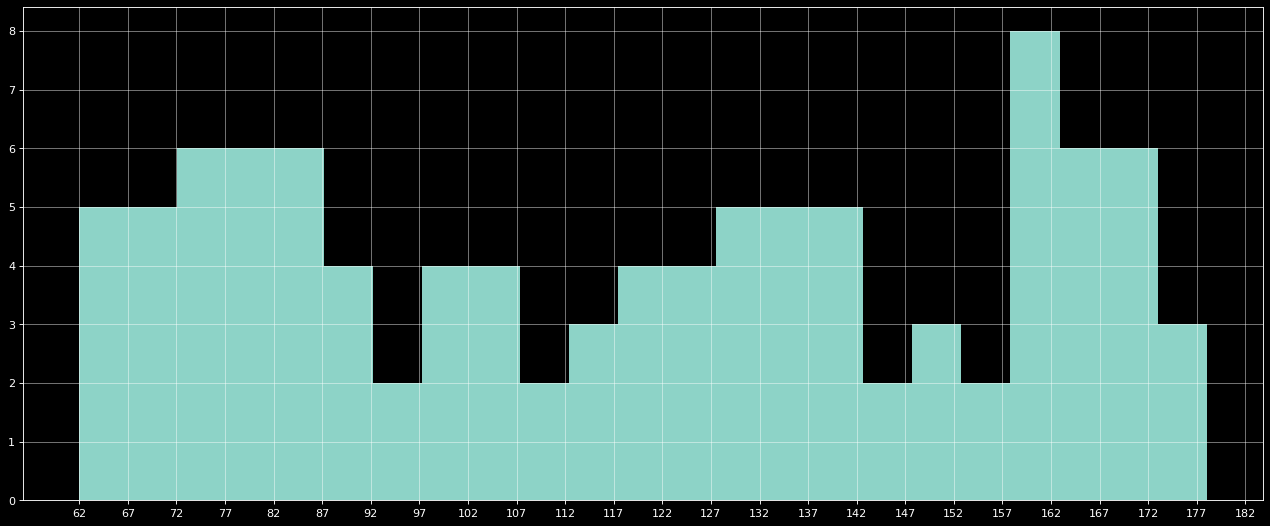

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# --- 假设上下文：先读取数据 ---
# df = pd.read_csv("IMDB-Movie-Data.csv")
# 为了演示，我这里手动创建一个模拟的 df，实际使用时请用上面的 read_csv
data = {'Runtime (Minutes)': np.random.randint(60, 180, 100)} # 生成100个60到180之间的随机时长
df = pd.DataFrame(data)

# --- 截图中的核心代码 ---

# 1. 提取数据
# .values 将 Series 转换为 numpy 数组，处理起来更快
runtime_data = df["Runtime (Minutes)"].values

# 2. 计算极值
max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print("最小值:", min_runtime, "最大值:", max_runtime)

# 计算极差
print("极差:", max_runtime - min_runtime)
print('-'*50)

# 3. 计算组数 (Bin Count)
# 这里假设想要每个柱子的宽度大概是 5 (分钟)
# // 5 表示整除，计算出一共需要多少个柱子
num_bin = (max_runtime - min_runtime) // 5

# 4. 设置图形大小
plt.figure(figsize=(20, 8), dpi=80)

# 5. 绘制直方图
# 第二个参数 bins 接收一个整数，代表把数据分成多少份
plt.hist(runtime_data, int(num_bin))

# 6. 设置辅助元素
plt.grid(alpha=0.5) # alpha是透明度，显示网格线方便读数

# 7. 设置 X 轴刻度
# range 的第三个参数是步长 (这里是 5)
# max_runtime + 5 是为了确保最大值也能被包含在刻度里
plt.xticks(range(min_runtime, max_runtime + 5, 5))

plt.show()

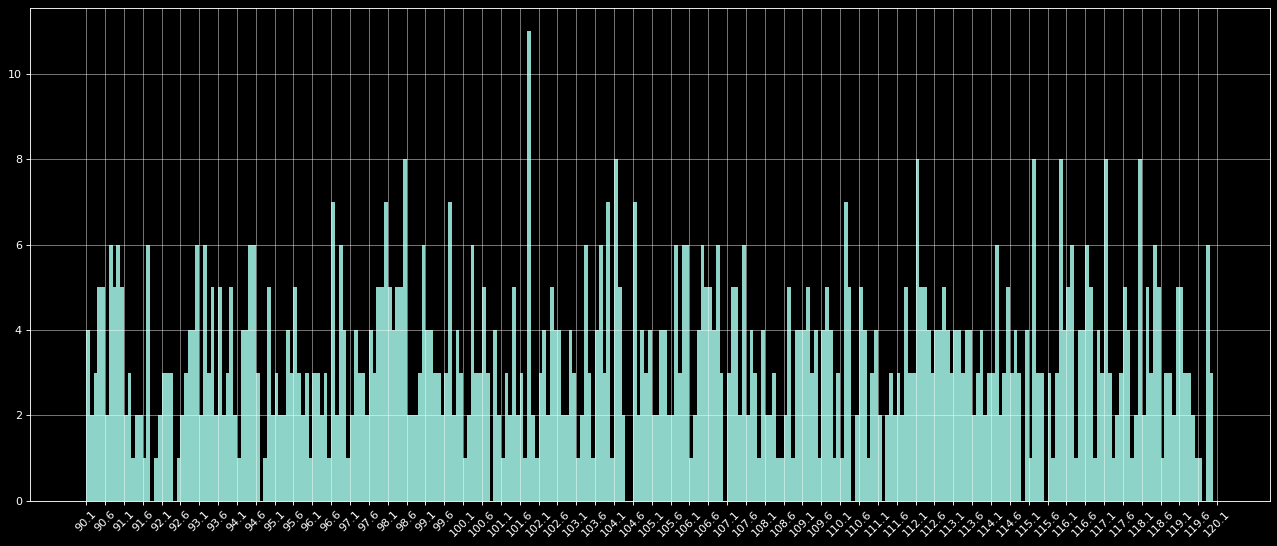

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# --- 模拟数据 (你的代码中是读取 CSV) ---
# 假设数据范围是 90 到 120，保留一位小数
# 实际使用时请保留你的 pd.read_csv
data_sim = np.random.uniform(90, 120, 1000)
runtime_data = np.round(data_sim, 1)

# 计算极值
max_runtime = runtime_data.max()
min_runtime = runtime_data.min()

# ------------------------------------------
# ⭐ 核心修改区域
# ------------------------------------------

# 1. 定义组距 (步长)
step = 0.1  # 这里改成了 0.1

# 2. 计算组数
# 结果可能为浮点数，hist 需要 int，所以下面画图时要转 int
print(f'最大评分减去最小评分为 {max_runtime - min_runtime}')
num_bin = (max_runtime - min_runtime) / step

print(f'组数为 {num_bin}')

# 3. 设置画布
plt.figure(figsize=(20, 8), dpi=80)

# 4. 绘制直方图
plt.hist(runtime_data, int(num_bin))

# 5. 生成 X 轴刻度列表
# 方法 A：使用你的 while 循环逻辑 (已优化浮点数精度)
_x = []
i = min_runtime
while i <= max_runtime + step:
    _x.append(i)
    i = i + step
    i = round(i, 1) # ⚠️重要：浮点数加法会有误差(变成7.99999)，round确保它是 8.0

# 方法 B (更推荐)：直接用 numpy 生成，一行搞定
# _x = np.arange(min_runtime, max_runtime + step, step)

# 6. 设置 X 轴刻度
# ⚠️ 注意：如果 0.1 太密，可以使用切片 _x[::5] 每隔5个显示一个
plt.xticks(_x[::5], rotation=45)

plt.grid(alpha=0.5)
plt.show()

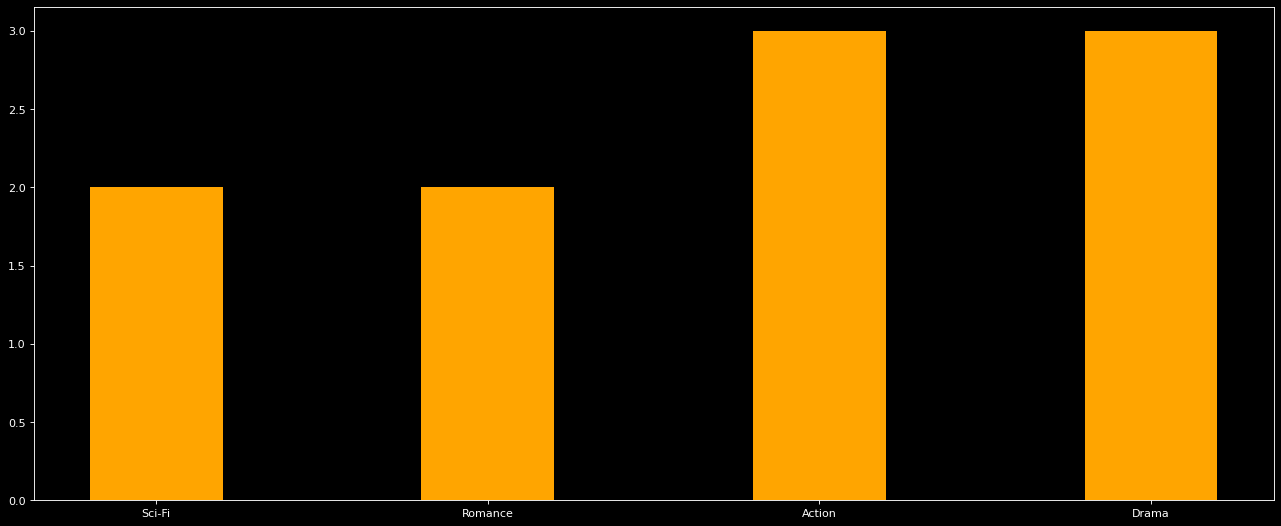

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# --- 1. 前置准备 (模拟之前的步骤) ---
# 假设 zeros_df 已经是填好数据的 One-Hot 矩阵
# (这里为了演示，手动创建一些数据)
zeros_df = pd.DataFrame({
    'Action': [1, 1, 0, 1, 0],
    'Sci-Fi': [0, 1, 0, 0, 1],
    'Romance': [0, 0, 1, 0, 1],
    'Drama':   [0, 0, 1, 1, 1]
})
print("--- 准备好的 One-Hot 矩阵 ---")
print(zeros_df)
print('-'*50)

# --- 2. 统计数量 (截图核心逻辑) ---
# sum(axis=0) 表示按列求和
# 因为矩阵里只有 0 和 1，所以列的和 = 该题材出现的次数
genre_count = zeros_df.sum(axis=0)

print("--- 统计结果 (无序) ---")
print(genre_count)
print('-'*50)

# --- 3. 排序 (截图核心逻辑) ---
# sort_values() 默认从小到大排序 (升序)
# 这样画出来的图会有阶梯感，更容易看出排名
genre_count = genre_count.sort_values()

print("--- 排序后的结果 ---")
print(genre_count)

# --- 4. 可视化画图 ---
_x = genre_count.index   # 题材名称 (Action, Drama...)
_y = genre_count.values  # 对应的数量 (2, 3...)

# 设置画布
plt.figure(figsize=(20, 8), dpi=80)

# 绘制条形图 (Bar Chart)
# 注意：这里用的是 plt.bar (分类数据)，不是 plt.hist (连续数据)
plt.bar(range(len(_x)), _y, width=0.4, color="orange")

# 设置 X 轴刻度
# 必须手动把数字索引 (0, 1, 2...) 替换成题材名称 (_x)
plt.xticks(range(len(_x)), _x)

plt.show()

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 1. 读取数据
# 确保 911.csv 在你的代码同级目录下，或者填写绝对路径
df = pd.read_csv("./911.csv")

# 2. 将时间字符串转为标准时间类型
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

# 3. 提取分类 (Feature Engineering)
# 原始 title 格式是 "分类: 具体事件" (如 "EMS: BACK PAIN/INJURY")
# split(": ") 切割后取第一个元素
temp_list = df["title"].str.split(": ").tolist()
cate_list = [i[0] for i in temp_list]  # 提取出 EMS, Fire, Traffic

# 4. 添加新列 "cate"
# 将列表转为 DataFrame 列并赋值回原表
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0], 1)))

# 5. 设置时间索引
# 原地修改，将索引变成时间轴
df.set_index("timeStamp", inplace=True)

# 查看结果
print(df.head(10))

                           lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   
2015-12-10 17:29:21  40.258061 -75.264680   
2015-12-10 14:39:21  40.121182 -75.351975   
2015-12-10 16:47:36  40.116153 -75.343513   
2015-12-10 16:56:52  40.251492 -75.603350   
2015-12-10 15:39:04  40.253473 -75.283245   
2015-12-10 16:46:48  40.182111 -75.127795   
2015-12-10 16:17:05  40.217286 -75.405182   
2015-12-10 16:51:42  40.289027 -75.399590   
2015-12-10 17:35:41  40.102398 -75.291458   

                                                                  desc  \
timeStamp                                                                
2015-12-10 17:10:52  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
2015-12-10 17:29:21  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2015-12-10 14:39:21  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
2015-12-10 16:47:36  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
2015-12-10 16:5

In [1]:
import pandas as pd

data = {
    '数学': [90, 85, 76, 59],
    '英语': [88, 92, 60, 70],
    '班级': ['A班', 'A班', 'B班', 'B班']
}
# 注意：我们把人名设为了索引（Index），这很重要！
df = pd.DataFrame(data, index=['张三', '李四', '王五', '赵六'])

print("--- 原始成绩单 ---")
print(df)

--- 原始成绩单 ---
    数学  英语  班级
张三  90  88  A班
李四  85  92  A班
王五  76  60  B班
赵六  59  70  B班


In [2]:
print("\n--- 例子1: 提取'张三'的成绩 ---")

# 1. 使用 loc (通过名字)
# 语法：df.loc[ 行名, 列名 ]
print(f"loc 结果:\n{df.loc['张三']}")

print('-' * 20)

# 2. 使用 iloc (通过位置下标)
# 语法：df.iloc[ 行下标, 列下标 ]
# '张三'在第 1 行（下标是 0）
print(f"iloc 结果:\n{df.iloc[0]}")


--- 例子1: 提取'张三'的成绩 ---
loc 结果:
数学    90
英语    88
班级    A班
Name: 张三, dtype: object
--------------------
iloc 结果:
数学    90
英语    88
班级    A班
Name: 张三, dtype: object


In [3]:
print("\n--- 例子2: 提取前两行 (张三和李四) ---")

# 1. 使用 loc (名字)
# 注意：这里写到了 '李四'，结果就真的包含 '李四'
print("loc 切片 (包含尾部):")
print(df.loc['张三':'李四'])

print('-' * 20)

# 2. 使用 iloc (数字)
# 注意：想取前两行(0, 1)，结束下标必须写 2
print("iloc 切片 (不包含尾部):")
print(df.iloc[0:2])


--- 例子2: 提取前两行 (张三和李四) ---
loc 切片 (包含尾部):
    数学  英语  班级
张三  90  88  A班
李四  85  92  A班
--------------------
iloc 切片 (不包含尾部):
    数学  英语  班级
张三  90  88  A班
李四  85  92  A班


series复习

In [10]:
import pandas as pd

df = pd.DataFrame({
    '班级': ['A班', 'B班', 'A班', 'B班', 'A班'],
    '姓名': ['张三', '李四', '王五', '赵六', '田七'],
    '数学': [90, 80, 85, 70, 95],
    '英语': [88, 78, 92, 60, 80]
})

print("--- 原始成绩表 ---")
print(df)

# 需求：算出每个班级的数学平均分
# 1. df.groupby('班级') -> 按班级分组
# 2. ['数学'] -> 只选数学这一列
# 3. .mean() -> 算平均值
mean_score = df.groupby('班级')['数学'].mean()

print("\n--- 各班数学平均分 ---")
print(mean_score)

--- 原始成绩表 ---
   班级  姓名  数学  英语
0  A班  张三  90  88
1  B班  李四  80  78
2  A班  王五  85  92
3  B班  赵六  70  60
4  A班  田七  95  80

--- 各班数学平均分 ---
班级
A班    90.0
B班    75.0
Name: 数学, dtype: float64


In [4]:
import pandas as pd

# 就像普通列表，但带了索引
s1 = pd.Series([10, 20, 30, 40])
print(s1)
# 结果：
# 0    10
# 1    20
# ...

0    10
1    20
2    30
3    40
dtype: int64


In [5]:
# 指定 index，相当于给每个数据贴个标签
s2 = pd.Series([100, 200, 300], index=['张三', '李四', '王五'])
print(s2)
# 结果：
# 张三    100
# 李四    200
# 王五    300

张三    100
李四    200
王五    300
dtype: int64


In [9]:
# 1. 像字典一样查 (推荐)
print(s2.loc['张三'])  # 输出 100

# 2. 像列表一样查 (下标)
print(s2.iloc[0])      # 输出 100

# 3. 切片 (注意 loc 和 iloc 的区别在这里同样适用)
print(s2['张三':'李四']) # 包含李四

100
100
张三    100
李四    200
dtype: int64
